<a href="https://colab.research.google.com/github/ElenaKapetanoudi/WorldBank_Poverty_Prediction/blob/main/WorldBank_Poverty_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor

# Data Processing

## Load Datasets

In [ ]:
train_features = pd.read_csv("train_hh_features.csv")
train_labels = pd.read_csv("train_hh_gt.csv")
train_poverty = pd.read_csv("train_rates_gt.csv")
test_features = pd.read_csv("test_hh_features.csv")

print(train_features.shape)
print(train_labels.shape)
print(train_poverty.shape)
print(test_features.shape)


(104234, 88)
(104234, 3)
(3, 20)
(103023, 88)


## Column Names

In [ ]:
print("Train Features Columns: ", train_features.columns.tolist())
print("Train Labels Columns: ", train_labels.columns.tolist())
print("Train Poverty Columns: ", train_poverty.columns.tolist())
print("Test Features Columns: ", test_features.columns.tolist())

Train Features Columns:  ['hhid', 'com', 'weight', 'strata', 'utl_exp_ppp17', 'male', 'hsize', 'num_children5', 'num_children10', 'num_children18', 'age', 'owner', 'water', 'toilet', 'sewer', 'elect', 'water_source', 'sanitation_source', 'dweltyp', 'num_adult_female', 'num_adult_male', 'num_elderly', 'employed', 'sworkershh', 'share_secondary', 'educ_max', 'sfworkershh', 'any_nonagric', 'sector1d', 'region1', 'region2', 'region3', 'region4', 'region5', 'region6', 'region7', 'urban', 'consumed100', 'consumed200', 'consumed300', 'consumed400', 'consumed500', 'consumed600', 'consumed700', 'consumed800', 'consumed900', 'consumed1000', 'consumed1100', 'consumed1200', 'consumed1300', 'consumed1400', 'consumed1500', 'consumed1600', 'consumed1700', 'consumed1800', 'consumed1900', 'consumed2000', 'consumed2100', 'consumed2200', 'consumed2300', 'consumed2400', 'consumed2500', 'consumed2600', 'consumed2700', 'consumed2800', 'consumed2900', 'consumed3000', 'consumed3100', 'consumed3200', 'consumed

## Merge Features & Labels

In [ ]:
train = train_features.merge(
    train_labels,
    on=["survey_id", "hhid"],
    how="inner"
)

train.shape

(104234, 89)

## Train Columns

### Train Column Names

In [ ]:
train.columns.tolist()

['hhid',
 'com',
 'weight',
 'strata',
 'utl_exp_ppp17',
 'male',
 'hsize',
 'num_children5',
 'num_children10',
 'num_children18',
 'age',
 'owner',
 'water',
 'toilet',
 'sewer',
 'elect',
 'water_source',
 'sanitation_source',
 'dweltyp',
 'num_adult_female',
 'num_adult_male',
 'num_elderly',
 'employed',
 'sworkershh',
 'share_secondary',
 'educ_max',
 'sfworkershh',
 'any_nonagric',
 'sector1d',
 'region1',
 'region2',
 'region3',
 'region4',
 'region5',
 'region6',
 'region7',
 'urban',
 'consumed100',
 'consumed200',
 'consumed300',
 'consumed400',
 'consumed500',
 'consumed600',
 'consumed700',
 'consumed800',
 'consumed900',
 'consumed1000',
 'consumed1100',
 'consumed1200',
 'consumed1300',
 'consumed1400',
 'consumed1500',
 'consumed1600',
 'consumed1700',
 'consumed1800',
 'consumed1900',
 'consumed2000',
 'consumed2100',
 'consumed2200',
 'consumed2300',
 'consumed2400',
 'consumed2500',
 'consumed2600',
 'consumed2700',
 'consumed2800',
 'consumed2900',
 'consumed3000',


### Train Column Types

In [ ]:
train.dtypes.value_counts()

,count
object,64
int64,20
float64,5


## ID Removal

In [ ]:
y = train["cons_ppp17"]

x = train.drop(columns=[
    "cons_ppp17",
    "survey_id",
    "hhid"
])


## Missing Values

In [ ]:
missing = x.isnull().mean().sort_values(ascending=False)
missing


,0
sector1d,0.135551
dweltyp,0.011570
utl_exp_ppp17,0.000815
consumed5000,0.000633
consumed4900,0.000537
...,...
region4,0.000000
region6,0.000000
any_nonagric,0.000000
sfworkershh,0.000000


## Numeric & Categorical

In [ ]:
num_cols = x.select_dtypes(include=["int64", "float64"]).columns
cat_cols = x.select_dtypes(include=["object"]).columns

len(num_cols), len(cat_cols)

(22, 64)

## Imputation

In [ ]:
num_imputer = SimpleImputer(strategy="median")
cat_imputer = SimpleImputer(strategy="most_frequent")

x[num_cols] = num_imputer.fit_transform(x[num_cols])
x[cat_cols] = cat_imputer.fit_transform(x[cat_cols])

## One Hot Encoding

In [ ]:
x = pd.get_dummies(x, columns=cat_cols, drop_first=True)

x.shape


(104234, 118)

## Scaling

In [ ]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Data Analysis

## Feature Description

Το σύνολο δεδομένων περιλαμβάνει πληροφορίες σε επίπεδο νοικοκυριού που προέρχονται από έρευνες φτώχειας και ευημερίας. Τα χαρακτηριστικά μπορούν να ομαδοποιηθούν σε επιμέρους κατηγορίες, ανάλογα με το είδος της πληροφορίας που παρέχουν:

* Αναγνωριστικά και πληροφορίες δειγματοληψίας περιλαμβάνουν οι μεταβλητές hhid, survey_id, weight και strata. Οι μεταβλητές αυτές χρησιμοποιούνται για την ταυτοποίηση των νοικοκυριών και των ερευνών, καθώς και για τη σωστή αναγωγή των αποτελεσμάτων σε επίπεδο πληθυσμού μέσω των πληθυσμιακών βαρών και της στρωματοποίησης.
* Δημογραφικά χαρακτηριστικά και σύνθεση νοικοκυριού περιγράφονται από τις μεταβλητές male, age, hsize, num_children5, num_children10, num_children18, num_adult_female, num_adult_male και num_elderly. Οι μεταβλητές αυτές αποτυπώνουν τη δομή του νοικοκυριού, την ηλικιακή κατανομή και τη σύνθεση φύλου, στοιχεία που επηρεάζουν άμεσα τις ανάγκες κατανάλωσης και το επίπεδο διαβίωσης.
* Χαρακτηριστικά στέγασης και βασικών υποδομών περιλαμβάνουν οι μεταβλητές owner, water, toilet, sewer, elect, water_source, sanitation_source και dweltyp. Οι μεταβλητές αυτές περιγράφουν τις συνθήκες κατοικίας και την πρόσβαση σε βασικές υπηρεσίες, οι οποίες αποτελούν σημαντικούς δείκτες ποιότητας ζωής και φτώχειας.
* Εκπαίδευση και απασχόληση αποτυπώνονται μέσω των μεταβλητών employed, sworkershh, sfworkershh, educ_max, share_secondary, any_nonagric και sector1d. Οι μεταβλητές αυτές αντικατοπτρίζουν το ανθρώπινο κεφάλαιο του νοικοκυριού, τη συμμετοχή στην αγορά εργασίας και τις πηγές εισοδήματος, παράγοντες που συνδέονται άμεσα με την οικονομική ευημερία.
* Γεωγραφικά χαρακτηριστικά περιλαμβάνουν οι μεταβλητές region1, region2, region3, region4, region5, region6, region7 και urban. Οι μεταβλητές αυτές επιτρέπουν τη διάκριση των νοικοκυριών ανά γεωγραφική περιοχή και επίπεδο αστικότητας, διευκολύνοντας τη μελέτη χωρικών ανισοτήτων.
* Δείκτες κατανάλωσης τροφίμων των τελευταίων 7 ημερών περιλαμβάνουν οι μεταβλητές consumed100 έως consumed5000. Οι μεταβλητές αυτές αποτυπώνουν τη διατροφική συμπεριφορά των νοικοκυριών και αποτελούν από τους πιο ισχυρούς προγνωστικούς παράγοντες της φτώχειας και της οικονομικής κατάστασης.
* Τέλος, μεταβλητές ευημερίας και κατανάλωσης αποτελούν οι cons_ppp17 και utl_exp_ppp17, οι οποίες εκφράζουν την κατανάλωση και τις δαπάνες σε όρους αγοραστικής δύναμης (PPP). Η μεταβλητή κατανάλωσης ανά άτομο χρησιμοποιείται ως βασικός στόχος πρόβλεψης στην παρούσα εργασία.

## Statistical Description

In [ ]:
pd.DataFrame(x)[num_cols].describe()

,com,weight,strata,utl_exp_ppp17,hsize,num_children5,num_children10,num_children18,age,num_adult_female,...,sworkershh,share_secondary,sfworkershh,region1,region2,region3,region4,region5,region6,region7
count,104234.0,104234.000000,104234.000000,104234.000000,104234.000000,104234.000000,104234.000000,104234.000000,104234.000000,104234.000000,...,104234.000000,104234.000000,104234.000000,104234.000000,104234.000000,104234.000000,104234.000000,104234.000000,104234.000000,104234.000000
mean,1.0,926.357254,4.424813,510.358943,3.611653,0.287872,0.338066,0.571004,52.589414,1.115423,...,0.856188,0.228924,0.320479,0.232736,0.157166,0.106395,0.053150,0.235959,0.098653,0.115941
std,0.0,1121.680081,2.429095,437.306172,1.927880,0.561682,0.598281,0.831472,15.732361,0.770004,...,0.380948,0.315494,0.400869,0.422577,0.363959,0.308344,0.224333,0.424599,0.298197,0.320156
min,1.0,2.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,15.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.0,270.000000,2.000000,190.115800,2.000000,0.000000,0.000000,0.000000,41.000000,1.000000,...,0.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.0,582.000000,5.000000,411.917570,3.000000,0.000000,0.000000,0.000000,52.000000,1.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.0,1128.000000,7.000000,722.440060,5.000000,0.000000,1.000000,1.000000,64.000000,1.000000,...,1.000000,0.500000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.0,23832.000000,8.000000,5880.471200,21.000000,5.000000,6.000000,6.000000,98.000000,7.000000,...,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Feature Quality

In [ ]:
x.isnull().mean().sort_values(ascending=False)


,0
com,0.0
weight,0.0
strata,0.0
utl_exp_ppp17,0.0
hsize,0.0
...,...
consumed4600_Yes,0.0
consumed4700_Yes,0.0
consumed4800_Yes,0.0
consumed4900_Yes,0.0


<Axes: xlabel='cons_ppp17'>

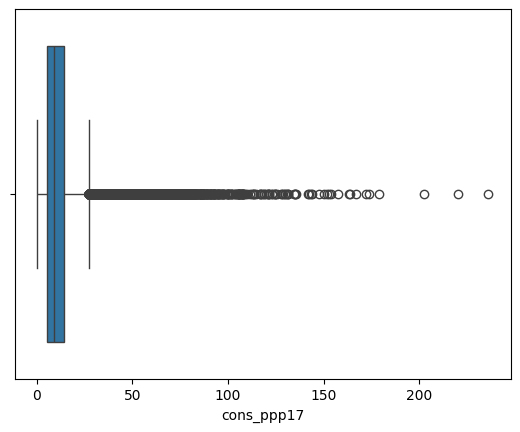

In [ ]:
sns.boxplot(x=y)

<Axes: xlabel='cons_ppp17', ylabel='Count'>

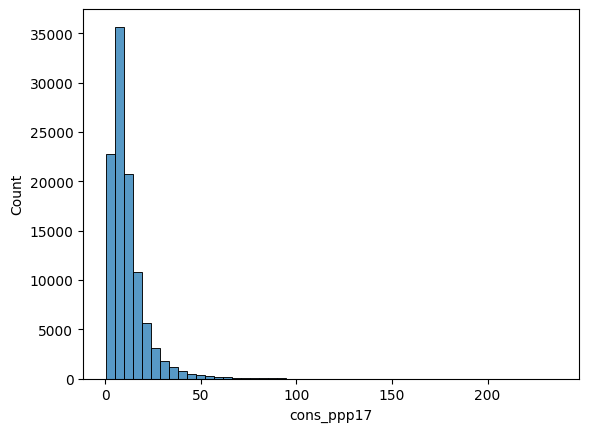

In [ ]:
sns.histplot(y, bins=50)

Η ποιότητα των μεταβλητών αξιολογήθηκε μέσω ελέγχου ελλιπών τιμών, στατιστικής περιγραφής των αριθμητικών χαρακτηριστικών και ανάλυσης κατανομών και ακραίων τιμών. Τα περισσότερα χαρακτηριστικά παρουσιάζουν πλήρη ή σχεδόν πλήρη κάλυψη, με περιορισμένο ποσοστό missing values, τα οποία αντιμετωπίστηκαν με κατάλληλες τεχνικές συμπλήρωσης χωρίς σημαντική απώλεια πληροφορίας. Οι αριθμητικές μεταβλητές εμφανίζουν ρεαλιστικές κατανομές, ενώ η ύπαρξη ακραίων τιμών, ιδιαίτερα στη μεταβλητή κατανάλωσης, θεωρείται αναμενόμενη και αντικατοπτρίζει πραγματικές κοινωνικοοικονομικές ανισότητες, παρά σφάλματα καταγραφής. Συνεπώς, τα δεδομένα κρίνονται αξιόπιστα και κατάλληλα για ανάλυση και εφαρμογή μοντέλων μηχανικής μάθησης στο πλαίσιο πρόβλεψης φτώχειας.

## Feature Importance

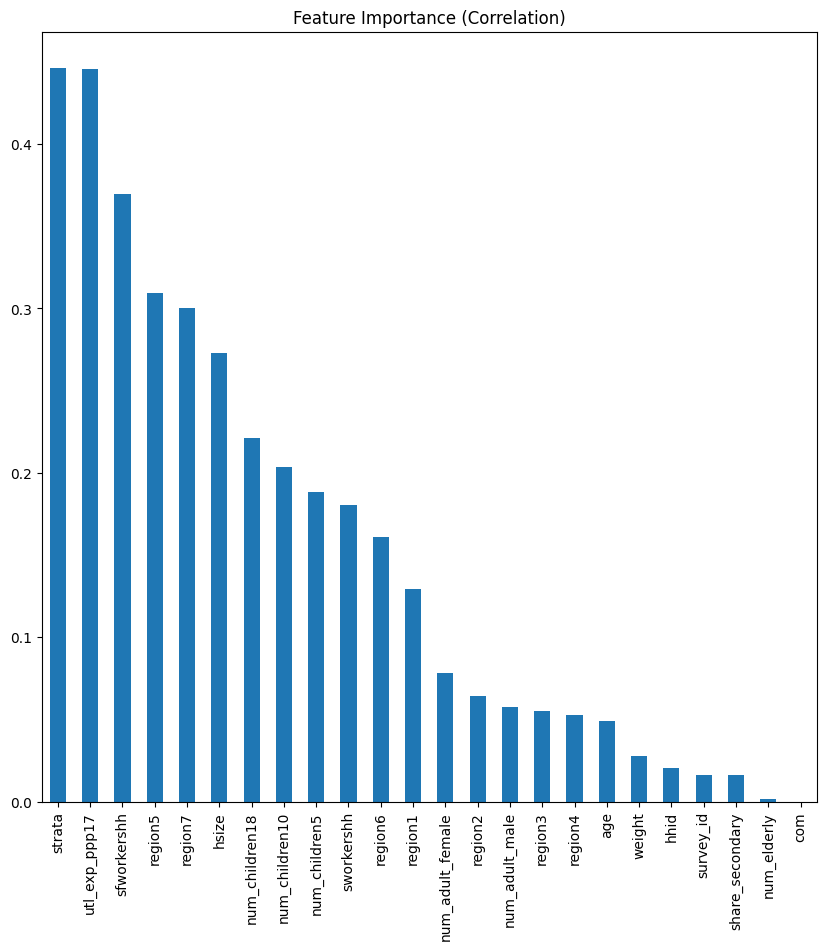

In [ ]:
corr = train.corr(numeric_only=True)["cons_ppp17"].abs()
corr = corr.drop("cons_ppp17")
corr = corr.sort_values(ascending=False)

corr.plot(kind="bar", figsize=(10,10), title="Feature Importance (Correlation)")
plt.show()


Η σημαντικότητα των χαρακτηριστικών εκτιμήθηκε μέσω της απόλυτης συσχέτισής τους με τη μεταβλητή στόχο (κατανάλωση ανά άτομο). Από την ανάλυση προκύπτει ότι χαρακτηριστικά που σχετίζονται άμεσα με την κατανάλωση και τις συνολικές δαπάνες του νοικοκυριού εμφανίζουν τη μεγαλύτερη συσχέτιση, ενώ ακολουθούν δημογραφικοί παράγοντες, όπως το μέγεθος και η σύνθεση του νοικοκυριού, καθώς και χαρακτηριστικά απασχόλησης και γεωγραφικής περιοχής.

## Feature Correlation With Each Other

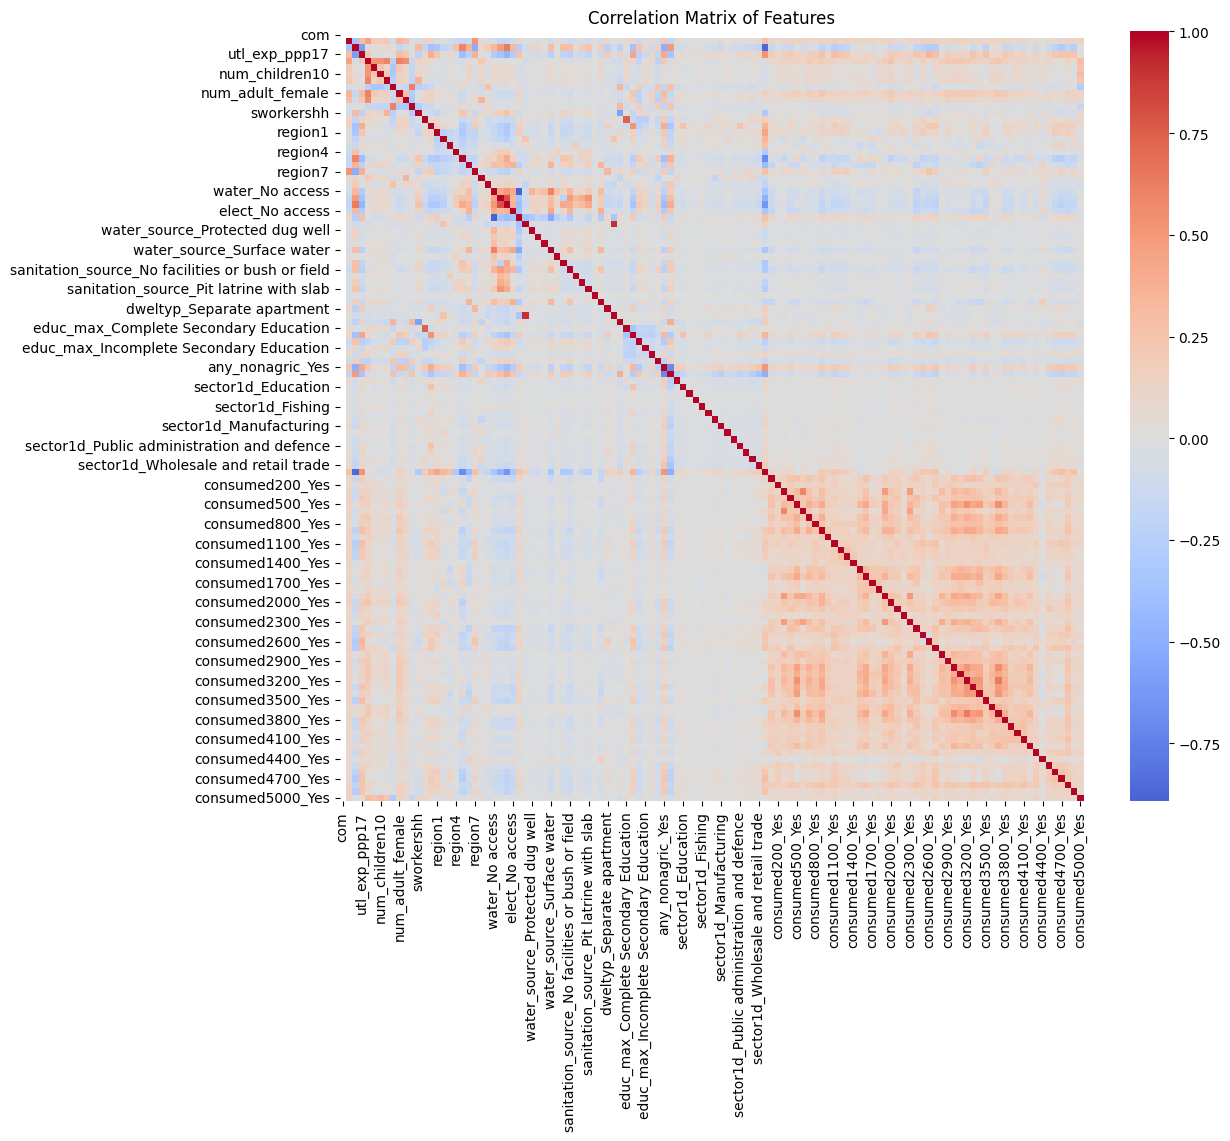

In [ ]:
corr_matrix = x.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, cmap="coolwarm", center=0)
plt.title("Correlation Matrix of Features")
plt.show()


Τα αποτελέσματα δείχνουν την ύπαρξη ισχυρών συσχετίσεων μεταξύ μεταβλητών που περιγράφουν παρόμοιες έννοιες, όπως οι δείκτες κατανάλωσης τροφίμων και οι μεταβλητές που αφορούν τη σύνθεση του νοικοκυριού. Παράλληλα, παρατηρούνται μέτριες συσχετίσεις μεταξύ χαρακτηριστικών απασχόλησης και εκπαίδευσης, γεγονός που υποδηλώνει τη συνάφεια αυτών των παραγόντων με το επίπεδο ευημερίας. Η ύπαρξη συσχετισμένων χαρακτηριστικών λαμβάνεται υπόψη στη μοντελοποίηση, καθώς μπορεί να επηρεάσει γραμμικά μοντέλα, ενώ τα δενδροειδή μοντέλα είναι λιγότερο ευαίσθητα σε φαινόμενα πολυσυγγραμμικότητας.

# Algorithms & Results

## Train & Validation Sets Split

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(
    x_scaled, y, test_size=0.2, random_state=42
)

## MSE Calculation

In [ ]:
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

## Linear Regression

In [ ]:
lr = LinearRegression()
lr.fit(x_train, y_train)

pred_lr = lr.predict(x_val)
rmse_lr = rmse(y_val, pred_lr)

rmse_lr

np.float64(6.8534605284794266)

## Random Forest

In [ ]:
rf = RandomForestRegressor(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)

rf.fit(x_train, y_train)

pred_rf = rf.predict(x_val)
rmse_rf = rmse(y_val, pred_rf)

rmse_rf

np.float64(6.115607018380617)

## Gradient Boosting

In [ ]:
gbr = GradientBoostingRegressor(
    n_estimators=100,
    learning_rate=0.05,
    random_state=42
)

gbr.fit(x_train, y_train)

pred_gbr = gbr.predict(x_val)
rmse_gbr = rmse(y_val, pred_gbr)

rmse_gbr

np.float64(6.334317254805698)

## MLP

In [ ]:
mlp = MLPRegressor(
    hidden_layer_sizes=(128, 64),
    max_iter=100,
    random_state=42
)

mlp.fit(x_train, y_train)

pred_mlp = mlp.predict(x_val)
rmse_mlp = rmse(y_val, pred_mlp)

rmse_mlp

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


np.float64(7.013516905382263)

## Justification Of Choice

Για την επίλυση του προβλήματος παλινδρόμησης επιλέχθηκαν αλγόριθμοι διαφορετικής πολυπλοκότητας και φιλοσοφίας, ώστε να επιτευχθεί ουσιαστική σύγκριση των αποτελεσμάτων. Η Γραμμική Παλινδρόμηση χρησιμοποιήθηκε ως μοντέλο αναφοράς (baseline), λόγω της απλότητας και της ερμηνευσιμότητάς της. Ο Random Forest εφαρμόστηκε ως μη γραμμικό ensemble μοντέλο, ικανό να αποτυπώσει σύνθετες σχέσεις και αλληλεπιδράσεις μεταξύ των χαρακτηριστικών. Επιπλέον, χρησιμοποιήθηκε ο αλγόριθμος Gradient Boosting, ο οποίος βασίζεται στη διαδοχική εκπαίδευση αδύναμων μοντέλων και συχνά επιτυγχάνει υψηλή ακρίβεια σε προβλήματα παλινδρόμησης. Τέλος, εφαρμόστηκε νευρωνικό δίκτυο πολλαπλών επιπέδων (MLP), ώστε να διερευνηθεί η απόδοση μεθόδων βαθιάς μάθησης στο συγκεκριμένο σύνολο δεδομένων.

## Results

In [ ]:
results = pd.DataFrame({
    "Model": [
        "Linear Regression",
        "Random Forest",
        "Gradient Boosting",
        "Neural Network (MLP)"
    ],
    "RMSE": [
        rmse_lr,
        rmse_rf,
        rmse_gbr,
        rmse_mlp
    ]
})

results

,Model,RMSE
0,Linear Regression,6.853461
1,Random Forest,6.115607
2,Gradient Boosting,6.334317
3,Neural Network (MLP),7.013517


## Model Comparison Plot

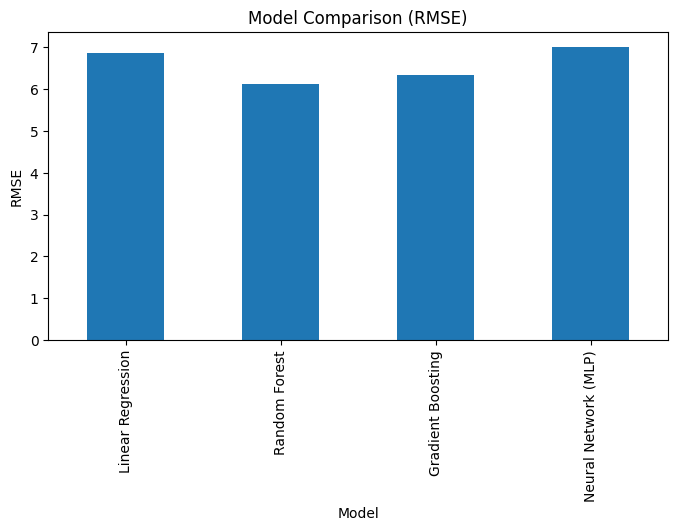

In [ ]:
results.set_index("Model").plot(
    kind="bar",
    legend=False,
    figsize=(8,4),
    title="Model Comparison (RMSE)"
)

plt.ylabel("RMSE")
plt.show()

## Comparison Of Results

Η σύγκριση των αλγορίθμων πραγματοποιήθηκε με βάση τη μετρική RMSE στο validation set. Η Γραμμική Παλινδρόμηση παρουσίασε υψηλή τιμή σφάλματος, κάτι που ήταν αναμενόμενο, καθώς δεν μπορεί να αποτυπώσει αποτελεσματικά τις μη γραμμικές σχέσεις που υπάρχουν στα δεδομένα φτώχειας. Το Random Forest πέτυχε τη χαμηλότερη τιμή RMSE, εμφανίζοντας την καλύτερη συνολική απόδοση, γεγονός που δείχνει ότι τα ensemble μοντέλα βασισμένα σε δέντρα μπορούν να μοντελοποιήσουν με επιτυχία τη σύνθετη δομή των δεδομένων. Το Gradient Boosting παρουσίασε επίσης καλή απόδοση, με ελαφρώς υψηλότερο σφάλμα σε σχέση με το Random Forest. Αντίθετα, το νευρωνικό δίκτυο (MLP) εμφάνισε τη μεγαλύτερη τιμή RMSE, πιθανώς λόγω ανεπαρκούς ρύθμισης υπερπαραμέτρων ή της ευαισθησίας του σε θέματα κλίμακας και ποιότητας των χαρακτηριστικών. Συνολικά, τα αποτελέσματα δείχνουν ότι τα tree-based ensemble μοντέλα είναι καταλληλότερα για το συγκεκριμένο πρόβλημα πρόβλεψης φτώχειας.

# Algorithm Validation

## Best Model Choice

In [ ]:
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(
        n_estimators=100, random_state=42, n_jobs=-1
    ),
    "Gradient Boosting": GradientBoostingRegressor(
        n_estimators=100, learning_rate=0.05, random_state=42
    ),
    "Neural Network (MLP)": MLPRegressor(
        hidden_layer_sizes=(128, 64),
        max_iter=100,
        random_state=42
    )
}

best_model_name = results.loc[results["RMSE"].idxmin(), "Model"]
best_model = models[best_model_name]

best_model

RandomForestRegressor(n_jobs=-1, random_state=42)

## Best Model Training

In [ ]:
best_model.fit(x_train, y_train)

RandomForestRegressor(n_jobs=-1, random_state=42)

In [ ]:
test_encoded = pd.get_dummies(test_features, drop_first=True)
test_encoded = test_encoded.reindex(
    columns=x.columns,
    fill_value=0
)

test_predictions = best_model.predict(test_encoded)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


## CSV Creation

### PHC

In [ ]:
pred_consumption = pd.DataFrame({
    "survey_id": test_features["survey_id"],
    "household_id": test_features["hhid"],
    "cons_ppp17": test_predictions
})

pred_consumption.to_csv("predicted_household_consumption.csv", index=False)


### PPD

In [ ]:
poverty_lines = train_poverty.columns[1:]

test_pred_df = test_features[["survey_id"]].copy()
test_pred_df["predicted_consumption"] = test_predictions

poverty_results = []

for survey_id, group in test_pred_df.groupby("survey_id"):
    row = {"survey_id": survey_id}

    for col in poverty_lines:
        threshold = float(col.replace("pct_hh_below_", ""))
        row[col] = (group["predicted_consumption"] < threshold).mean()

    poverty_results.append(row)

poverty_df = pd.DataFrame(poverty_results)
poverty_df


,survey_id,pct_hh_below_3.17,pct_hh_below_3.94,pct_hh_below_4.60,pct_hh_below_5.26,pct_hh_below_5.88,pct_hh_below_6.47,pct_hh_below_7.06,pct_hh_below_7.70,pct_hh_below_8.40,pct_hh_below_9.13,pct_hh_below_9.87,pct_hh_below_10.70,pct_hh_below_11.62,pct_hh_below_12.69,pct_hh_below_14.03,pct_hh_below_15.64,pct_hh_below_17.76,pct_hh_below_20.99,pct_hh_below_27.37
0,400000,0.0,0.0,0.000376,0.001562,0.002314,0.003298,0.011486,0.223029,0.415073,0.461478,0.646000,0.699118,0.701606,0.715695,0.861941,0.986431,1.0,1.0,1.0
1,500000,0.0,0.0,0.000204,0.001635,0.002891,0.003563,0.010834,0.231537,0.436531,0.472011,0.656680,0.710790,0.713038,0.720981,0.854373,0.985925,1.0,1.0,1.0
2,600000,0.0,0.0,0.000205,0.001637,0.002338,0.002923,0.009441,0.230322,0.436062,0.470611,0.649052,0.704469,0.706837,0.716161,0.849999,0.986029,1.0,1.0,1.0


In [ ]:
poverty_df.to_csv(
    "predicted_poverty_distribution.csv",
    index=False
)


# Results Explanation

Τα αποτελέσματα της εργασίας δείχνουν ότι τα μη γραμμικά μοντέλα αποδίδουν καλύτερα στο συγκεκριμένο πρόβλημα πρόβλεψης φτώχειας, καθώς τα δεδομένα χαρακτηρίζονται από σύνθετες και μη γραμμικές σχέσεις. Παρ’ όλα αυτά, κάθε μοντέλο παρουσιάζει συγκεκριμένους περιορισμούς. Η Γραμμική Παλινδρόμηση αδυνατεί να αποτυπώσει πολύπλοκες αλληλεπιδράσεις μεταξύ των χαρακτηριστικών, γεγονός που οδηγεί σε υψηλότερο σφάλμα. Τα ensemble μοντέλα (Random Forest και Gradient Boosting) είναι πιο ανθεκτικά στον θόρυβο και στις μη γραμμικότητες, ωστόσο απαιτούν μεγαλύτερο υπολογιστικό κόστος και ενδέχεται να υπερπροσαρμοστούν όταν τα δεδομένα είναι περιορισμένα ή μη αντιπροσωπευτικά. Το νευρωνικό δίκτυο (MLP) μπορεί να πετύχει πολύ καλή απόδοση, αλλά είναι ιδιαίτερα ευαίσθητο στην ποιότητα των δεδομένων, στην κλιμάκωση των χαρακτηριστικών και στις υπερπαραμέτρους του.

Τα μοντέλα αποδίδουν καλύτερα σε περιπτώσεις όπου τα χαρακτηριστικά περιγράφουν με σαφήνεια τις κοινωνικοοικονομικές συνθήκες των νοικοκυριών, όπως πληροφορίες για εισόδημα, κατανάλωση, εκπαίδευση και βασικές υποδομές. Αντίθετα, η απόδοσή τους μειώνεται όταν υπάρχουν πολλά ελλιπή δεδομένα, θόρυβος ή όταν σημαντικοί παράγοντες φτώχειας δεν αποτυπώνονται στα διαθέσιμα χαρακτηριστικά. Ιδιαίτερα το MLP εμφανίζει δυσκολίες όταν τα δεδομένα περιέχουν πολλά missing values ή δεν έχουν υποστεί σωστή προεπεξεργασία.

Όσον αφορά τη σημασία των χαρακτηριστικών, τα tree-based μοντέλα δίνουν μεγαλύτερη έμφαση σε μεταβλητές που σχετίζονται άμεσα με την οικονομική κατάσταση του νοικοκυριού, όπως η κατανάλωση, το μέγεθος του νοικοκυριού και οι βασικές παροχές, καθώς αυτές συμβάλλουν περισσότερο στη μείωση του σφάλματος πρόβλεψης. Η σωστή επιλογή και ποιότητα αυτών των χαρακτηριστικών είναι καθοριστική για την ακρίβεια των μοντέλων.

Τέλος, πιθανοί τρόποι βελτίωσης των αποτελεσμάτων περιλαμβάνουν την ενσωμάτωση επιπλέον πληροφοριών, όπως γεωγραφικά δεδομένα, δείκτες πρόσβασης σε υπηρεσίες υγείας και εκπαίδευσης ή χρονικές μεταβολές της οικονομικής κατάστασης. Επιπλέον, η βελτίωση της ποιότητας των δεδομένων μέσω καλύτερης διαχείρισης ελλιπών τιμών και πιο λεπτομερούς καταγραφής κοινωνικοοικονομικών παραγόντων θα μπορούσε να οδηγήσει σε πιο αξιόπιστες και ακριβείς προβλέψεις.